In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

1) Мир теории вероятностей. Математические модели для описания процессов, которые носят случайный характер

Случайные величины и их распределения:
- равномерное
- экспоненциальное
- нормальное
- биномиальное
- гипергеометрическое 

Для каждого такого распределения есть конкретная формула, по которой мы можем сказать, с какой вероятностью случайная величина окажется В КАКОМ-ТО ИНТЕРВАЛЕ ЗНАЧЕНИЙ (например, от 0,5 до 0,8)

In [3]:
# Предположим, наш мир устроен так, что рост человека (Х) имеет нормальное распределение с параметрами 
# mean = 170 (мат ожидание) и variance = 400 (дисперсия)

2) Реальный осязаемый мир, в котором на наблюдаемые процессы влияет огромное число факторов, описать которые всецело невозможно.

И мы хотим, абстрагируясь от каких-то маловажных факторов, описать интересующий нас процесс (случайную величину) с помощью какой-либо модели из мира теории вероятностей.

Возникает несколько вопросов:
- какое распределение использовать?
- каковы параметры этого распределения?
- как понять, что это распределение действительно нам подходит и дает адекватные результаты?
- как понять, что наблюдения из двух разных групп могут быть описаны одним или разными распределениями?

Несколько правил: 
- Любое наблюдение (конкретное число, которое мы регистрируем) явлется частным случаем реализации случайной величины, которую мы изучаем. Одна и та же монета, брошенная 100 раз, может дать различное количество орлов.
- Просто глядя на наблюдения (тем более на 1 реализацию) нельзя что-либо определенное сказать про подходящую мат модель для этого процесса. Чем больше наблюдений, тем точнее мы можем ОЦЕНИТЬ параметры распределения интересующей нас величины.
- При очень большом количестве наблюдений даже незначительные отлокнения от "идеала" могут приводить к тому, что наблюдаемые данные не будут соответствовать "идеалу".

In [77]:
mean = 170
var = 400
std = np.sqrt(var)
n = 10
np.random.seed(1)
sample1 = np.round(stats.norm.rvs(loc = mean, scale = std, size = n), 2)

np.random.seed(10)
sample2 = np.round(stats.norm.rvs(loc = mean+10, scale = std, size = n), 2)

3. Все, что в наших силах - это проверить, насколько наблюдаемые данные адекватны либо неадекватны предлагаемой математической (теоретической) модели. 

Мы предполагаем, что модель адекватна (нулевая гипотеза). Либо, что у модели есть какие-то конкретные значения параметров (среднее, дисперсия или что-то еще).

На основе этого предположения мы находим такой интервал значений, в который может попадать интересующая нас случайная величина с заданной вероятностью (либо какая-то ее трансформация, обладающая удобными для математики свойствами). Такая случайная величина называется "статистика". 

А дальше мы проверяем, попадает ли расчетное значение этой "статистики", полученное на основе выборки, в указанный интервал. Если оно попадает, тогда нет оснований считать, что данные противоречат выбранной модели (выдвинутой гипотезе). Тогда можно использовать эту модель для моделирования процессов, связанных с интересующей случайной величиной

Если же расчетное значение оказывается за пределами интервала, тогда данные противоречат выбранной модели. Либо нужно использовать другую модель, либо гипотетическое значение параметра неадекватно. 

In [78]:
# Мы хотим ответить на ряд важных вопросов
# 1: Каков средний рост человека?
# 2: Допустим, sample1 собран в стране А, а sample2 собран в стране Б. 
# Достаточно ли у нас оснований считать, что средний рост людей в этих странах отличается?
# 3: Адекватно ли использовать нормальное распределение для описания роста человека как случайной величины?
print(sample1)
print(sample2)

[202.49 157.76 159.44 148.54 187.31 123.97 204.9  154.78 176.38 165.01]
[206.63 194.31 149.09 179.83 192.43 165.6  185.31 182.17 180.09 176.51]


In [79]:
print(sample1.mean(), sample2.mean())

168.05800000000002 181.19699999999997


In [80]:
alpha = 0.05

In [81]:
stats.norm.interval(confidence = 1-alpha, loc = sample1.mean(), scale = np.sqrt(sample1.var()/len(sample1)))

(np.float64(153.29515215106218), np.float64(182.82084784893786))

In [82]:
stats.norm.interval(confidence = 1-alpha, loc = sample2.mean(), scale = np.sqrt(sample2.var()/len(sample2)))

(np.float64(171.87527445158292), np.float64(190.51872554841702))

Собранные данные не будут противоречить распределениям случайной величины с математическим ожиданием от 153.3 до 182.8 см с вероятностью 95%

In [83]:
stats.ttest_ind(sample1, sample2)

TtestResult(statistic=np.float64(-1.3992598009947217), pvalue=np.float64(0.17873189515658366), df=np.float64(18.0))

p-value - это вероятность, что данные не противоречат гипотезе о равенстве роста в двух странах, т.е. это вероятность, что между жителями двух стран нет разницы в росте

Наблюдаемые данные не противоречат гипотезе, что рост жителей стран не отличается

In [58]:
print(stats.shapiro(sample1))
print(stats.shapiro(sample2))

ShapiroResult(statistic=np.float64(0.9563838363944316), pvalue=np.float64(0.7439854593576153))
ShapiroResult(statistic=np.float64(0.9610390159178497), pvalue=np.float64(0.7976528446773954))


<Axes: ylabel='Count'>

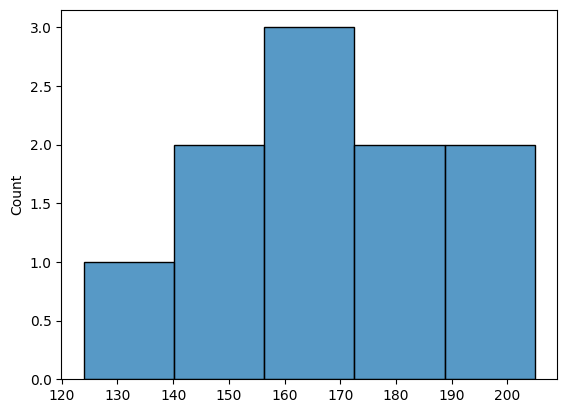

In [41]:
sns.histplot(sample1)

<Axes: ylabel='Count'>

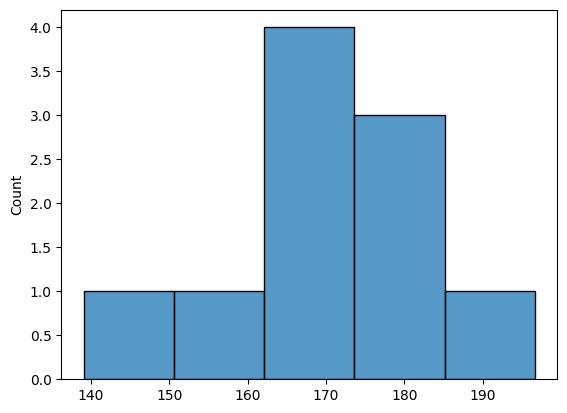

In [42]:
sns.histplot(sample2)

In [69]:
mean = 170
var = 400
std = np.sqrt(var)
n = 10000
np.random.seed(1)
sample1 = np.round(stats.norm.rvs(loc = mean, scale = std, size = n), 2)

np.random.seed(10)
sample2 = np.round(stats.norm.rvs(loc = mean+1, scale = std, size = n), 2)

In [70]:
stats.norm.interval(confidence = 1-alpha, loc = sample1.mean(), scale = np.sqrt(sample1.var()/len(sample1)))

(np.float64(169.80397335421927), np.float64(170.58700864578074))

In [71]:
stats.norm.interval(confidence = 1-alpha, loc = sample2.mean(), scale = np.sqrt(sample2.var()/len(sample2)))

(np.float64(170.7140407271257), np.float64(171.48992327287428))

In [72]:
print(sample1.mean(), sample2.mean())

170.195491 171.101982


In [73]:
stats.ttest_ind(sample1, sample2)

TtestResult(statistic=np.float64(-3.2233470509279782), pvalue=np.float64(0.0012690507190869639), df=np.float64(19998.0))

t-test говорит, что разница в росте есть!

In [74]:
print(stats.shapiro(sample1))
print(stats.shapiro(sample2))

ShapiroResult(statistic=np.float64(0.9998155904042466), pvalue=np.float64(0.590375094900416))
ShapiroResult(statistic=np.float64(0.9998043967266134), pvalue=np.float64(0.5282027519837116))


C:\Anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


<Axes: ylabel='Count'>

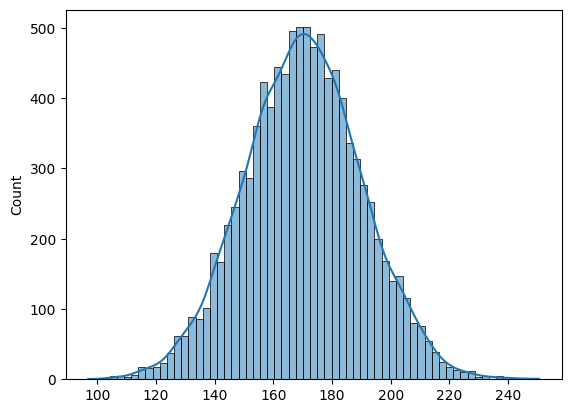

In [76]:
sns.histplot(sample1, kde = True)